In [1]:
import numpy as np
import os
import pickle
import torch
import torch.nn as nn
from models.vrnn import *
import matplotlib.pyplot as plt

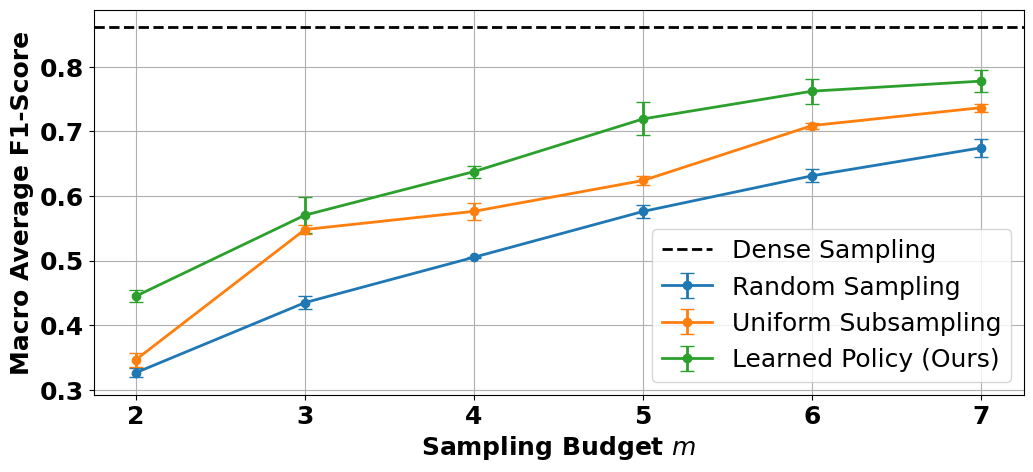

In [2]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
budgets = [2,3,4,5,6,7,-1]
seeds = [0,1,2]
f1s_sub = {b: [] for b in budgets[:-1]}
f1s_rand = {b: [] for b in budgets[:-1]}
f1s_learn = {b: [] for b in budgets[:-1]}
f1s_dense = []
for seed in seeds:
    for b in budgets:
        # budget of -1 is unconstrained case
        if b == -1:
            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_dense/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_dense.append(np.mean(f1s))
        else:
            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_budget{b}_uniform_subsampling/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_sub[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture/vrnn/learned_policy_budget{b}/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_learn[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_budget{b}_random/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_rand[b].append(np.mean(f1s))



plt.errorbar(f1s_rand.keys(),[np.mean(f1_val) for f1_val in f1s_rand.values()],[np.std(f1_val) for f1_val in f1s_rand.values()],capsize=5,marker='o',label='Random Sampling',linewidth=2)
plt.errorbar(f1s_sub.keys(),[np.mean(f1_val) for f1_val in f1s_sub.values()],[np.std(f1_val) for f1_val in f1s_sub.values()],capsize=5,marker='o',label='Uniform Subsampling',linewidth=2)
plt.errorbar(f1s_learn.keys(),[np.mean(f1_val) for f1_val in f1s_learn.values()],[np.std(f1_val) for f1_val in f1s_learn.values()],capsize=5,marker='o',label='Learned Policy (Ours)',linewidth=2)
plt.axhline(np.mean(f1s_dense),linestyle='--',c='k',label='Dense Sampling',linewidth=2)
# plt.ylim([0,1])
plt.grid()
plt.legend(fontsize=18)
ax.set_xlabel(r"Sampling Budget $m$",fontsize=18,fontweight='bold')
ax.set_ylabel(r"Macro Average F1-Score",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.savefig("gesture_result.pdf",bbox_inches='tight')

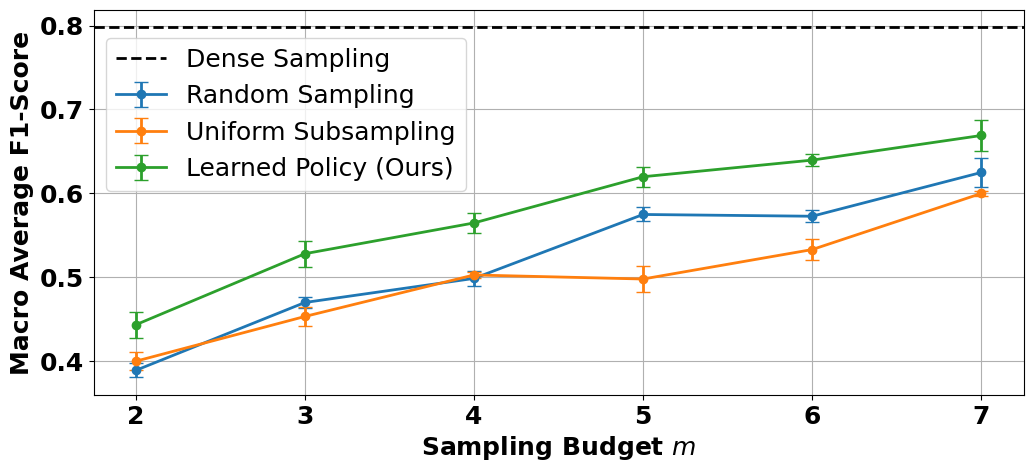

In [3]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(12,5))
budgets = [2,3,4,5,6,7,-1]
seeds = [0,1,2]
f1s_sub = {b: [] for b in budgets[:-1]}
f1s_rand = {b: [] for b in budgets[:-1]}
f1s_learn = {b: [] for b in budgets[:-1]}
f1s_dense = []
for seed in seeds:
    for b in budgets:
        if b == -1:
            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_dense/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_dense.append(np.mean(f1s))
        else:

            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_budget{b}_uniform_subsampling/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_sub[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture_impair/vrnn/learned_policy_budget{b}/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_learn[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_budget{b}_random/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_rand[b].append(np.mean(f1s))

plt.errorbar(f1s_rand.keys(),[np.mean(f1_val) for f1_val in f1s_rand.values()],[np.std(f1_val) for f1_val in f1s_rand.values()],capsize=5,marker='o',label='Random Sampling',linewidth=2)
plt.errorbar(f1s_sub.keys(),[np.mean(f1_val) for f1_val in f1s_sub.values()],[np.std(f1_val) for f1_val in f1s_sub.values()],capsize=5,marker='o',label='Uniform Subsampling',linewidth=2)
plt.errorbar(f1s_learn.keys(),[np.mean(f1_val) for f1_val in f1s_learn.values()],[np.std(f1_val) for f1_val in f1s_learn.values()],capsize=5,marker='o',label='Learned Policy (Ours)',linewidth=2)
plt.axhline(np.mean(f1s_dense),linestyle='--',c='k',label='Dense Sampling',linewidth=2)
# plt.ylim([0,1])
plt.grid()
plt.legend(fontsize=18,loc='upper left',bbox_to_anchor=(0, 0.96))
ax.set_xlabel(r"Sampling Budget $m$",fontsize=18,fontweight='bold')
ax.set_ylabel(r"Macro Average F1-Score",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.savefig("gesture_imp_result.pdf",bbox_inches='tight')

---